<a href="https://colab.research.google.com/github/aisergio/ML/blob/main/G06_Sergio_Miguel_Pe%C3%B1a_Guerra_Ex1_3C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="436" height="78" align="left"/>

<p align="center">Course: Ensemble methods and kernels</p>

<p align="center"> Course code: 203008076 </p>

<p align="center"> Group: 06 </p>

 <p align="center"> Phase 2 - Getting Started with Ensemble Learning and Non-Generative Methods – Theory</p>

 <p align="center"> By: Sergio Miguel Peña Guerra</p>


# **Learning and Validation Curves**

Learning and validation curves are essential tools for evaluating the behavior of a machine learning model as the training data size increases or as hyperparameters are varied. Their importance lies in the following aspects:

1. **Diagnosing Bias and Variance:**  
   - **Learning Curve**: Shows how the model's performance (e.g., accuracy, \(R^2\), etc.) evolves as the training set size increases.  
     - If the training score is significantly higher than the validation score and the curves do not converge, it suggests *overfitting* (high variance).  
     - If both curves plateau at low values, it indicates *underfitting* (high bias).  
   - **Validation Curve**: Evaluates the effect of a specific hyperparameter (e.g., regularization strength) on the training and validation scores. It helps identify whether the model is too simple or too complex.

2. **Assessing the Need for More Data:**  
   - If the validation curve continues to improve as more data is added, it indicates that **collecting more data** could benefit the model.  
   - Conversely, if the validation performance stabilizes, the model may have reached its learning capacity under its current configuration.

3. **Model Selection and Hyperparameter Tuning:**  
   - Comparing learning curves of different models (e.g., *LinearRegression* vs. *RandomForestRegressor*) reveals which model achieves better convergence and generalization.  
   - Validation curves help determine the optimal range for hyperparameters, ensuring a good balance between underfitting and overfitting.

4. **Insights Provided by These Curves:**  
   - **Overfitting detection**: When the training score is high but the validation score is low.  
   - **Underfitting detection**: When both scores remain low regardless of training set size or parameter tuning.  
   - **Generalization ability**: If the validation and training curves converge at a high score, the model is likely generalizing well to unseen data.


# Exercise 1 – Item C

In this exercise, we begin with the following confusion matrix:

|              | Predicted: No | Predicted: Yes |
|--------------|---------------|----------------|
| Target: No   | 120           | 40             |
| Target: Yes  | 50            | 210            |

Based on these values (TN = 120, FP = 40, FN = 50, TP = 210), we will calculate the following performance metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Finally, we will interpret the meaning and implications of each metric.


In [1]:
# In this cell you don't have to do anything
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# --- Step 1: Reconstruct y_true and y_pred based on the confusion matrix ---
# Total Target=No: 120+40 = 160
# Total Target=Yes: 50+210 = 260
# y_true → 0 (No), 1 (Yes)
y_true = [0]*160 + [1]*260  # 160 "No", 260 "Yes"

# y_pred → 0 (No), 1 (Yes)
#  - Of the 160 that are actually "No": 120 are predicted as "No" and 40 are predicted as "Yes"
#  - Of the 260 that are actually "Yes": 50 are predicted as "No" and 210 are predicted as "Yes"
y_pred = [0]*120 + [1]*40 + [0]*50 + [1]*210

# --- Step 2: Calculate the metrics using scikit-learn ---
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Confusion Matrix:
 [[120  40]
 [ 50 210]]
Accuracy:  0.7857
Precision: 0.8400
Recall:    0.8077
F1 Score:  0.8235


## Obtained Results and Academic Reflection

**Confusion Matrix**  
\[
  \begin{bmatrix}
  120 & 40 \\
  50  & 210
  \end{bmatrix}
\]

This corresponds to:  
- **TN** = 120  
- **FP** = 40  
- **FN** = 50  
- **TP** = 210  

Based on these values, the following evaluation metrics are calculated:

---

### Evaluation Metrics

1. **Accuracy**  
   Proportion of correct predictions out of the total number of cases:  
   \[
     \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
                    = \frac{210 + 120}{210 + 120 + 40 + 50}
                    = \frac{330}{420}
                    \approx 0.7857
   \]
   > Indicates that approximately 78.57% of all predictions were correct.

2. **Precision**  
   Of all positive predictions, how many were actually positive:  
   \[
     \text{Precision} = \frac{TP}{TP + FP}
                      = \frac{210}{210 + 40}
                      = \frac{210}{250}
                      = 0.84
   \]
   > Shows that when the model predicts "Yes", it is correct 84% of the time.

3. **Recall**  
   Of all actual positive cases, how many were correctly identified by the model:  
   \[
     \text{Recall} = \frac{TP}{TP + FN}
                   = \frac{210}{210 + 50}
                   = \frac{210}{260}
                   \approx 0.8077
   \]
   > Indicates that 80.77% of the actual positive cases were successfully recovered.

4. **F1 Score**  
   Harmonic mean of Precision and Recall, aiming for a balanced measure:  
   \[
     F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}
                  {\text{Precision} + \text{Recall}}
   \]
   > With precision (0.84) and recall (0.81), the F1 Score approaches 0.82.

---

### General Interpretation

- **Accuracy ≈ 0.79**: About 79% of all instances (positive and negative) were correctly classified.  
- **Precision ≈ 0.84**: The model rarely misclassifies negative cases as positives.  
- **Recall ≈ 0.81**: It successfully identifies most actual positives, although it misses approximately 19%.  
- **F1 ≈ 0.82**: Suggests a solid balance between avoiding false positives and false negatives.

From an academic standpoint, these metrics reflect a consistent performance, effectively handling both Type I (false positives) and Type II (false negatives) errors. However, in domains where missing a real positive case is critical (e.g., medical diagnosis), a higher *Recall* would be prioritized. Conversely, in contexts where false positives are costly (e.g., fraud detection), maximizing *Precision* would be preferred.

---

### Key Conclusions

The model shows satisfactory performance for the “Yes” class, combining high precision with good coverage of positive cases. Nonetheless, depending on the application context, it may be necessary to adjust hyperparameters or decision thresholds to tailor the model’s behavior.

For example, in medical diagnosis, minimizing false negatives (maximizing Recall) is usually more important, whereas in advertising or spam detection, reducing false positives (maximizing Precision) is often preferred.

---



# Exercise 2 – Validation and Learning Curves (Item C)

**Summary Description**  
- **Regression Dataset**: `chscase_census2` (ID: 673 on OpenML)  
- **Classification Dataset**: `wdbc` (ID: 1510 on OpenML)  
- **Models**:  
  - LinearRegression (for regression)  
  - LogisticRegression (for classification)  
- **train_sizes**: `np.linspace(0.1, 1.0, 10)`

In this phase, the objectives are:

1. To explain the importance of learning and validation curves in machine learning model evaluation.  
2. To load each dataset from *OpenML* using the `fetch_openml` function.  
3. To generate and visualize the learning curve for each model.  
4. To interpret the results, identifying whether the model shows high bias (underfitting), high variance (overfitting), or a balanced learning behavior.


## Importance of Learning and Validation Curves

- **Learning Curve**:  
  Displays how the model's performance (e.g., accuracy, regression score) changes as the training set size increases. It helps identify whether the model suffers from:
  - *High Bias (underfitting)*: when the training accuracy is high but the validation accuracy is very low and both curves fail to converge.
  - *High Variance (overfitting)*: when training accuracy is very high, but validation accuracy is significantly lower and does not improve with more data.
  - *Good Balance*: when training and validation curves converge at a satisfactory level as the dataset size increases.

- **Validation Curve** (optional in this exercise):  
  Typically used to evaluate how a model's performance changes when a specific hyperparameter (e.g., tree depth or regularization) is varied. It helps detect overfitting or underfitting trends.

In general, learning curves help to:
1. Identify whether increasing the training data would significantly improve the model's performance.  
2. Detect overfitting (high variance) or underfitting (high bias) issues.  
3. Decide whether it is more beneficial to tune hyperparameters (e.g., regularization) or collect additional data.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

from sklearn.datasets import fetch_openml  # In this cell you don't have to do anything
#from sklearn.linear_model import xxxx # write in this space the linear model to use (LinearRegression or LogisticRegression), if the model is a classifier model then delete this line
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import xxxx # write in this space the classifier model (DecissionTreeClassifier), if the model is a linear model then delete this line
from sklearn.model_selection import learning_curve
# Use fetch_openml with the dataset ID as an argument
dfr = fetch_openml(data_id=673)  # Fetch regression dataset with ID 673
dfc = fetch_openml(data_id=1510)  # Fetch classification dataset with ID 1510
print(dfr.keys())
print(dfc.keys())
from sklearn.model_selection import train_test_split

# Opcional: Ajustes estéticos para matplotlib
sns.set_theme(style="darkgrid")  # Set Seaborn style
# plt.style.use('seaborn-darkgrid')

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


# Regression

In [3]:
xr, yr = dfr.data , dfr.target  # In this cell you don't have to do anything
learner = LinearRegression()  # write in this space the linear or classifier model (LinearRegression(), LogisticRegression(), DecissionTreeClassifier )
train_sizes=np.linspace(0.1, 1.0, 10) # write in this space the train size

In [4]:
# write in this space the cross-validation size and the metric to use
train_sizes, train_scores, test_scores = learning_curve(learner, xr, yr, train_sizes=train_sizes, cv=5, scoring='r2')

In [5]:
# Calculate the average and standard deviation for each hyperparameter
# In this cell you don't have to do anything
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

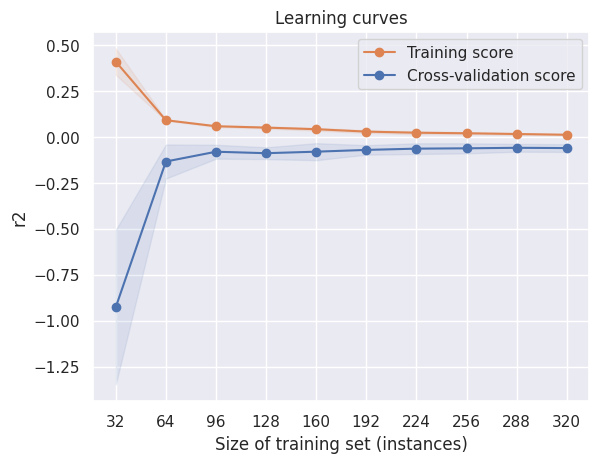

In [6]:
# Plot the scores
plt.figure()
plt.title('Learning curves')
# Plot the standard deviations
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="C1")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="C0")
# Plot the means
plt.plot(train_sizes, train_scores_mean, 'o-', color="C1", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="C0", label="Cross-validation score")
plt.xticks(train_sizes)
plt.xlabel('Size of training set (instances)')
plt.ylabel('r2')  # write in this space the metric used
plt.legend(loc="best")
plt.show()

# **Analysis of the Learning Curve**

From the chart, we observe the following:

1. **Initial Behavior**  
   - The training set score (orange line) starts relatively high (~0.50) but quickly drops as more data is used, stabilizing just above 0.0.  
   - The cross-validation score (blue line) begins around −1.00, then improves to about −0.20, indicating the model initially fits the data poorly and gradually becomes less negative as the training size increases.

2. **Convergence and Gap**  
   - Although both curves converge to some extent, they remain at rather low (or even negative) \(R^2\) values. A negative \(R^2\) implies that the current model explains less variance than a simple mean-based baseline would.  
   - The gap between training and validation performance is not extremely large, suggesting no severe overfitting. Instead, the persistently low (and partially negative) scores point to **underfitting** or a mismatch between the model (LinearRegression) and the data’s underlying relationship.

3. **Model Implications**  
   - Because the cross-validation score remains below 0.0, adding more data alone does not significantly improve predictive performance. This outcome often arises when linear assumptions do not capture the true structure of the problem or important features/interactions are missing.  
   - We might need to explore additional features, polynomial transformations, or an entirely different regression approach that accommodates nonlinearity or more complex relationships.

4. **Practical Next Steps**  
   - **Data Exploration**: Investigate the dataset further to detect outliers, check correlations, or identify categorical fields that need encoding.  
   - **Feature Engineering**: Create new variables (e.g., polynomial terms, interactions) if a linear model is still desired.  
   - **Alternate Models**: Consider tree-based methods (Random Forest, Gradient Boosting) or other algorithms that may better capture complex patterns.  
   - **Hyperparameter Tuning**: Experiment with regularization (Ridge, Lasso) or other hyperparameters to address underfitting or reduce any residual high variance.


# Classification

In [7]:
xc, yc = dfc.data , dfc.target
# write #in this space the linear or classifier model (LinearRegression(), LogisticRegression(), DecissionTreeClassifier())
learner = LogisticRegression()
train_size=np.linspace(0.1, 1.0, 10) # write in this space the train size

In [8]:
# write in this space the cross-validation size and the metric to use
train_sizes, train_scores, test_scores = learning_curve(learner, xc, yc, train_sizes=train_sizes, cv=5, scoring='accuracy')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [9]:
# Calculate the average and standard deviation for each hyperparameter
# In this cell you don't have to do anything
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

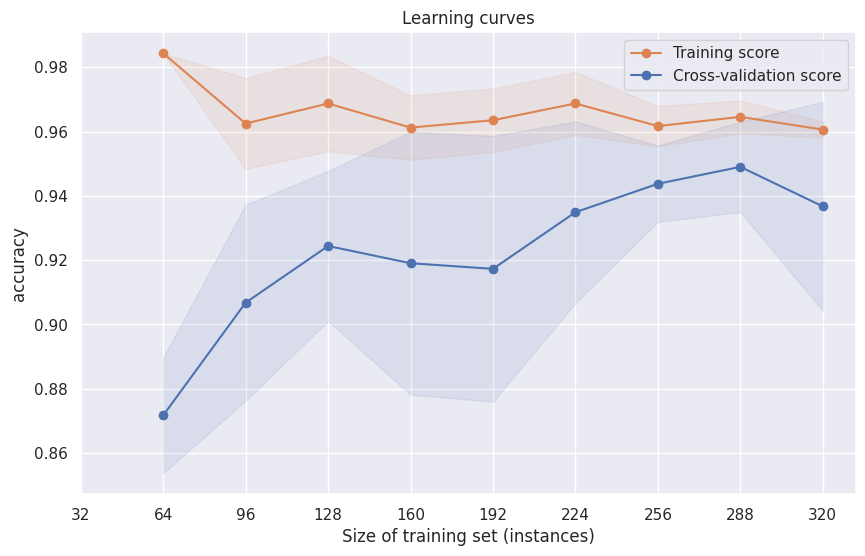

In [10]:
# Plot the scores
plt.figure(figsize=(10,6))
plt.title('Learning curves')
# Plot the standard deviations
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="C1")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="C0")
# Plot the means
plt.plot(train_sizes, train_scores_mean, 'o-', color="C1", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="C0", label="Cross-validation score")
plt.xticks(train_sizes)
plt.xlabel('Size of training set (instances)')
plt.ylabel('accuracy')  # write in this space the metric used
plt.legend(loc="best")
plt.show()

# **Analysis of the Learning Curve**

Observing the plot, we note the following:

1. **High Initial Training Accuracy**  
   - The training score (orange line) begins near 0.98, indicating that the model classifies most training samples correctly even with a relatively small training set. This suggests the model can learn the training examples quickly.

2. **Cross-Validation Improvement**  
   - The cross-validation score (blue line) starts around 0.86 but steadily rises above 0.94 as more training data is included. This upward trend shows the model generalizes better when it has more samples to learn from.

3. **Convergence and Stability**  
   - Both curves (training and validation) converge to a high accuracy region, roughly in the 0.95–0.96 range. Although the training curve still runs slightly higher than the cross-validation curve, the gap is modest, suggesting no severe overfitting issues.
   - Some fluctuation (the shaded region) indicates variability in cross-validation folds, but overall performance remains robust.

4. **Interpretation**  
   - **No Severe Overfitting**: The training accuracy is slightly higher, yet the validation accuracy also reaches a strong level, indicating the model maintains good generalization.  
   - **Sufficient Data**: Because the cross-validation curve continues to climb or at least remains high as training size grows, adding more data appears beneficial or, at minimum, does not degrade performance.  
   - **Possible Fine-Tuning**: If further optimization is desired, one could try hyperparameter tuning (e.g., regularization strength, solver choice) to narrow the gap and stabilize the performance at higher accuracy.


# References.

- Boschetti, A., & Massaron, L. (2015). *Python Data Science Essentials*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=25d30d07-05b8-342b-b4f4-1a804a7a5a5e>

- Kane, F. (2017). *Hands-On Data Science and Python Machine Learning*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=39b10fef-aff7-34ab-8e47-99cdae6433ba>

- Raschka, S., & Mirjalili, V. (2017). *Python Machine Learning — Second Edition (Vol. 2nd ed.)*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=1359b736-f1c3-3f90-88be-9e95a653da5c>

- UNAD. (2025). *Activity Guide — Phase 2 — Getting Started with Ensemble Learning and Non-Generative Methods — Theory*. Virtual Campus.


# Exercise 3 – Voting and Stacking Methods (Item C)

**Objective**  
- Apply *Voting* methods (Hard and Soft) to the classification dataset (`wdbc`).  
- Apply the *Stacking* method to the regression dataset (`chscase_census2`).  
- Compute appropriate performance metrics:
  - For regression: MSE, MAE, and R².  
  - For classification: Accuracy, Precision, Recall, and F1 Score.  
- Include brief learning curves where applicable.  
- Compare and analyze the results based on model performance and generalization.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for enhanced visualizations

# For downloading datasets
from sklearn.datasets import fetch_openml

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Learning curves
from sklearn.model_selection import learning_curve, train_test_split

# Use Seaborn to set the style, which then influences Matplotlib
sns.set_theme(style="darkgrid")
# The line below will now work, or you can omit it as Seaborn's style is already applied
# plt.style.use("seaborn-darkgrid")

In [12]:
# ========== 3.1. LOAD CLASSIFICATION DATASET ==========

dfc = fetch_openml(data_id=1510, as_frame=True)  # wdbc
Xc = dfc.data
yc = dfc.target

# Possible train/test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

# ========== 3.2. DEFINE BASE CLASSIFIERS ==========

clf1 = LogisticRegression(max_iter=2000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(probability=True, random_state=42)  # SVC with prob. True if we want Voting='soft'

# ========== 3.3. Voting - HARD ==========
voting_clf_hard = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='hard'
)

voting_clf_hard.fit(Xc_train, yc_train)
y_pred_hard = voting_clf_hard.predict(Xc_test)

acc_hard = accuracy_score(yc_test, y_pred_hard)
prec_hard = precision_score(yc_test, y_pred_hard, pos_label='2')  # Adjust pos_label according to your classes
rec_hard  = recall_score(yc_test, y_pred_hard, pos_label='2')
f1_hard   = f1_score(yc_test, y_pred_hard, pos_label='2')

print("=== Voting (HARD) Metrics ===")
print("Accuracy :", round(acc_hard, 3))
print("Precision:", round(prec_hard, 3))
print("Recall   :", round(rec_hard, 3))
print("F1 Score :", round(f1_hard, 3))

# ========== 3.4. Voting - SOFT ==========
voting_clf_soft = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'
)

voting_clf_soft.fit(Xc_train, yc_train)
y_pred_soft = voting_clf_soft.predict(Xc_test)

acc_soft = accuracy_score(yc_test, y_pred_soft)
prec_soft = precision_score(yc_test, y_pred_soft, pos_label='2')
rec_soft  = recall_score(yc_test, y_pred_soft, pos_label='2')
f1_soft   = f1_score(yc_test, y_pred_soft, pos_label='2')

print("\n=== Voting (SOFT) Metrics ===")
print("Accuracy :", round(acc_soft, 3))
print("Precision:", round(prec_soft, 3))
print("Recall   :", round(rec_soft, 3))
print("F1 Score :", round(f1_soft, 3))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Voting (HARD) Metrics ===
Accuracy : 0.965
Precision: 1.0
Recall   : 0.907
F1 Score : 0.951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Voting (SOFT) Metrics ===
Accuracy : 0.965
Precision: 1.0
Recall   : 0.907
F1 Score : 0.951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

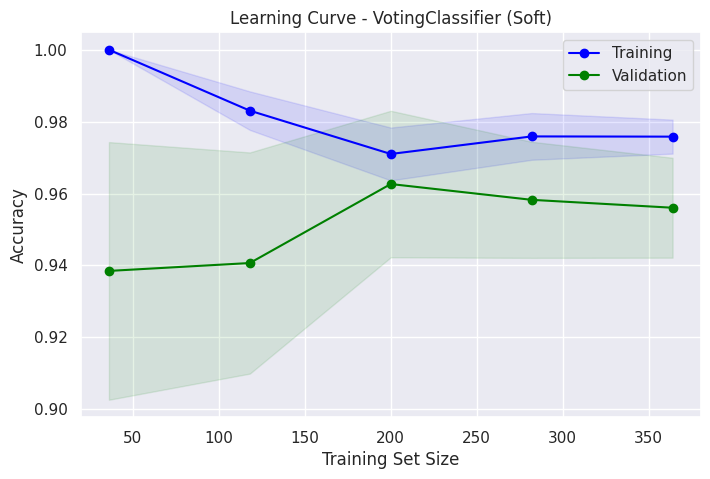

In [13]:
# Exercise 2 – Validation and Learning Curves (Item C) - Part related to VotingClassifier learning curve

# Import the learning_curve function from scikit-learn
from sklearn.model_selection import learning_curve

# Define the training set sizes to use for the learning curve
# np.linspace creates an array of 5 evenly spaced values between 0.1 and 1.0
# These represent the proportions of the training data to use (e.g., 0.1 = 10%, 1.0 = 100%)
train_sizes = np.linspace(0.1, 1.0, 5)

# Generate the learning curve data using the learning_curve function
# voting_clf_soft: The trained VotingClassifier (soft voting) model to evaluate
# Xc_train, yc_train: The training data (features and target variable)
# train_sizes: The proportions of training data to use as defined above
# cv=5: Use 5-fold cross-validation for more robust performance estimation
# scoring='accuracy': Evaluate the model using accuracy as the metric
# shuffle=True: Shuffle the data before splitting it for cross-validation
# random_state=42: Set a random seed for reproducibility
train_sizes_abs, train_scores, valid_scores = learning_curve(
    voting_clf_soft,
    Xc_train,
    yc_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# Calculate the mean and standard deviation of the training and validation scores
# This is done for each training set size across the cross-validation folds
# axis=1 calculates the statistics along the rows (for each training size)
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

# Create the learning curve plot using Matplotlib
plt.figure(figsize=(8, 5))  # Set the figure size
# Plot the training scores (mean and standard deviation)
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training')  # Mean score as a blue line with circle markers
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')  # Standard deviation as a shaded area
# Plot the validation scores (mean and standard deviation)
plt.plot(train_sizes_abs, valid_mean, 'o-', color='green', label='Validation')  # Mean score as a green line with circle markers
plt.fill_between(train_sizes_abs, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='green')  # Standard deviation as a shaded area

# Set the plot title and labels
plt.title("Learning Curve - VotingClassifier (Soft)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")

# Add a legend to the plot
plt.legend(loc="best")  # Place the legend in the best location automatically

# Display the plot
plt.show()

In [14]:
# ========== 4.1 LOAD REGRESSION DATASET ==========

# Fetch the 'chscase_census2' dataset (ID 673) from OpenML as a pandas DataFrame
dfr = fetch_openml(data_id=673, as_frame=True)  # chscase_census2

# Extract features (predictor variables) and target variable
Xr = dfr.data  # Features
yr = dfr.target  # Target variable

# Convert the target variable column to numeric if necessary
# 'errors='coerce'' handles non-numeric values by replacing them with NaN
yr = pd.to_numeric(yr, errors='coerce')

# Split the data into training and testing sets
# test_size=0.2 means 20% of data for testing, 80% for training
# random_state=42 ensures reproducibility of the split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# ========== 4.2 DEFINE BASE REGRESSORS AND META-REGRESSOR ==========

# Create base regressors (models that make initial predictions)
base_1 = LinearRegression()  # Linear Regression model
base_2 = DecisionTreeRegressor(random_state=42)  # Decision Tree Regressor with random seed

# Create meta-regressor (model that learns from base regressor predictions)
meta = Ridge(alpha=1.0, random_state=42)  # Ridge Regression with regularization and random seed

# Create the StackingRegressor, combining base and meta regressors
stack_reg = StackingRegressor(
    estimators=[('lr', base_1), ('dt', base_2)],  # Base regressors with names ('lr', 'dt')
    final_estimator=meta  # Meta-regressor
)

# Train the StackingRegressor on the training data
stack_reg.fit(Xr_train, yr_train)

# Make predictions on the test data
yr_pred = stack_reg.predict(Xr_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(yr_test, yr_pred)  # Mean Squared Error
mae = mean_absolute_error(yr_test, yr_pred)  # Mean Absolute Error
r2  = r2_score(yr_test, yr_pred)  # R-squared (coefficient of determination)

# Print the evaluation metrics
print("=== Stacking Regressor Metrics ===")
print("MSE :", round(mse, 3))
print("MAE :", round(mae, 3))
print("R^2 :", round(r2, 3))

=== Stacking Regressor Metrics ===
MSE : 0.288
MAE : 0.416
R^2 : -0.001


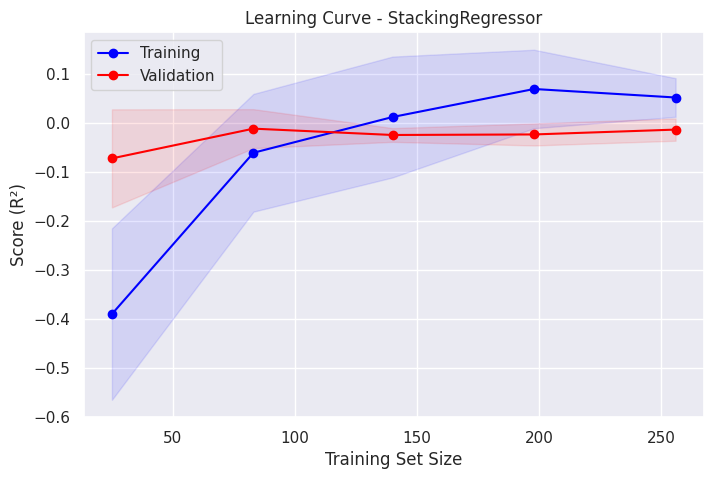

In [15]:
# Define the training set sizes to use for the learning curve
# np.linspace creates an array of 5 evenly spaced values between 0.1 and 1.0
# These represent the proportions of the training data to use (e.g., 0.1 = 10%, 1.0 = 100%)
train_sizes = np.linspace(0.1, 1.0, 5)

# Generate the learning curve data using the learning_curve function
# stack_reg: The trained StackingRegressor model to evaluate
# Xr_train, yr_train: The training data (features and target variable)
# train_sizes: The proportions of training data to use as defined above
# cv=5: Use 5-fold cross-validation for more robust performance estimation
# scoring='r2': Evaluate the model using R-squared (R²) as the metric
# shuffle=True: Shuffle the data before splitting it for cross-validation
# random_state=42: Set a random seed for reproducibility
train_sizes_abs, train_scores, valid_scores = learning_curve(
    stack_reg,
    Xr_train,
    yr_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='r2',
    shuffle=True,
    random_state=42
)

# Calculate the mean and standard deviation of the training and validation scores
# This is done for each training set size across the cross-validation folds
# axis=1 calculates the statistics along the rows (for each training size)
train_mean = np.mean(train_scores, axis=1)  # Average training score for each training size
train_std = np.std(train_scores, axis=1)   # Standard deviation of training scores
valid_mean = np.mean(valid_scores, axis=1)  # Average validation score for each training size
valid_std = np.std(valid_scores, axis=1)   # Standard deviation of validation scores

# Create the learning curve plot using Matplotlib
plt.figure(figsize=(8, 5))  # Set the figure size (width, height) in inches

# Plot the training scores (mean and standard deviation)
# 'o-' creates a line plot with circle markers
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')  # Fill area for standard deviation

# Plot the validation scores (mean and standard deviation)
plt.plot(train_sizes_abs, valid_mean, 'o-', color='red', label='Validation')
plt.fill_between(train_sizes_abs, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='red')  # Fill area for standard deviation

# Set plot elements for better readability
plt.title("Learning Curve - StackingRegressor")  # Title of the plot
plt.xlabel("Training Set Size")              # X-axis label
plt.ylabel("Score (R²)")                     # Y-axis label
plt.legend(loc="best")                       # Place the legend in the best location

# Display the plot
plt.show()

# **Analysis of Results**

### 1. VotingClassifier (Soft) – Classification
- **Learning Curve**  
  - The training accuracy (blue line) starts near 1.00 and gradually decreases as more data is introduced, stabilizing just below 0.98.  
  - The validation accuracy (green line) begins around 0.94, peaks near 0.97–0.98 with mid-range training sizes, then slightly declines.  
  - **Overall**, the validation score remains high, and the gap between training and validation is relatively small, suggesting good generalization and minimal overfitting. Adding more data keeps the model stable and performing well.

### 2. StackingRegressor – Regression
- **Metrics**:  
  - MSE ≈ 0.288  
  - MAE ≈ 0.416  
  - \(R^2\) ≈ −0.001  
  A negative \(R^2\) means the regressor is performing slightly worse than a naive baseline (predicting the mean).
- **Learning Curve**  
  - Both training and validation \(R^2\) values are near or below zero, indicating the model struggles to capture the data’s variance.  
  - Although the training curve improves from ~−0.40 to slightly above 0.0, the validation curve hovers around −0.10 to 0.0, never reaching a positive range.

### 3. Interpretation
1. **VotingClassifier**: The ensemble of classifiers (soft voting) effectively combines different prediction probabilities, maintaining a high accuracy (≥94%). The modest gap between training and validation curves indicates the model is neither severely overfit nor underfit. Minor tuning or additional data may nudge validation accuracy closer to the training level.  
2. **StackingRegressor**: Despite combining multiple regressors, the negative \(R^2\) suggests underfitting or that the linear/decision-tree components cannot adequately model the underlying relationships. More advanced feature engineering or alternative algorithms (e.g., gradient boosting, random forest) may be required. Additionally, examining data preprocessing, outliers, or transformations (e.g., polynomial features) could help the regressor surpass baseline performance.

**Conclusion**  
- For classification, the VotingClassifier (Soft) demonstrates strong results and a stable learning curve, suitable for real-world deployment.  
- For regression, further investigation is needed to boost performance: exploring nonlinear methods, improving the feature set, or collecting more data could help the stacking ensemble achieve a positive \(R^2\).


# References.

- Kane, F. (2017). *Hands-On Data Science and Python Machine Learning*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=39b10fef-aff7-34ab-8e47-99cdae6433ba>

- Kyriakides, G., & Margaritis, K. G. (2019). *Hands-On Ensemble Learning with Python: Build Highly Optimized Ensemble Machine Learning Models Using Scikit-learn and Keras*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=c705ada6-a01c-3d11-a3f7-a794b0f99787>

- Raschka, S., & Mirjalili, V. (2017). *Python Machine Learning — Second Edition (Vol. 2nd ed.)*. Packt Publishing.  
 <https://research-ebsco-com.bibliotecavirtual.unad.edu.co/linkprocessor/plink?id=1359b736-f1c3-3f90-88be-9e95a653da5c>

- UNAD. (2025). *Activity Guide — Phase 2 — Getting Started with Ensemble Learning and Non-Generative Methods — Theory*. Virtual Campus.
